In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
fpaths = "./testes_seq_paral/test_staub/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8]
speedups = []

In [36]:
sequenciais = []

for i in sizes:
    print(i)
    sequencial_local = []
    with open(f"{fpaths}logs_sequencial/log_seq_{i}_out.txt", "r") as arquivo:
        for linha in arquivo:
            if "Tempo sequencial" in linha:
                aux = linha.split(":")
                aux = aux[1].split("sec")
                aux = aux[0]
                print(float(aux))
                sequencial_local.append(float(aux))
    sequenciais.append(np.mean(sequencial_local))

small
189.583693
188.163239
188.6256
188.354742
188.206401
medium
367.476026
367.430401
367.453538
367.467439
367.440407
large
635.175533
635.105899
635.147105
635.02239
634.939008


In [37]:
paralelos = []

for i in sizes:
    paralelo_local = []
    for j in threads:
        print(f"{i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "Tempo paralelo" in linha:
                    aux = linha.split(":")
                    aux = aux[1].split("sec")
                    aux = aux[0]
                    print(float(aux))
                    paralelo_local.append(float(aux))
        paralelos.append(np.mean(paralelo_local))

small threads 2
108.072864
108.889611
108.371234
108.460996
109.06877
small threads 4
70.929011
70.865204
70.916157
72.429271
80.118893
small threads 8
81.322441
80.521172
80.309771
80.301169
80.447105
medium threads 2
232.975992
232.834731
232.910519
232.932244
232.39226
medium threads 4
156.817194
157.07184
156.810896
157.059374
157.026217
medium threads 8
157.975882
158.895709
157.508329
157.880035
158.075666
large threads 2
399.399746
399.064841
400.297025
398.223904
399.516853
large threads 4
271.235388
270.657106
270.384351
270.716483
270.59458
large threads 8
271.180509
271.736956
272.485675
272.161286
271.716693


In [31]:
sequenciais

[188.586735, 367.4535622, 635.0779869999999]

In [32]:
paralelos

[108.572695,
 90.81220109999998,
 87.40157793333333,
 232.8091492,
 194.8831267,
 182.61112586666667,
 399.3004738,
 335.00902770000005,
 313.9580930666667]

In [33]:
speedups = []

speedup_local = [sequenciais[0] / paralelos[i] for i in range(0,3)] 
speedups.append(speedup_local)
speedup_local = [sequenciais[1] / paralelos[i] for i in range(3,6)] 
speedups.append(speedup_local)
speedup_local = [sequenciais[2] / paralelos[i] for i in range(6,9)]
speedups.append(speedup_local)

In [34]:
speedups

[[1.736962824769156, 2.0766673719573574, 2.1577040078595258],
 [1.578346742225026, 1.8855073213477955, 2.012218918513738],
 [1.5904764173109776, 1.8957040989615093, 2.022811327450462]]

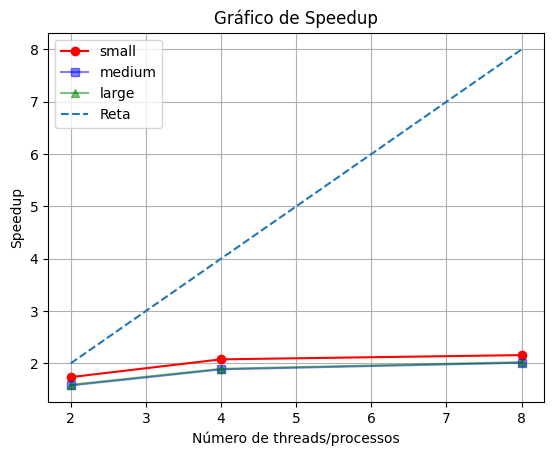

In [43]:
plt.plot(threads, speedups[0], label='small', color='red', marker='o')
plt.plot(threads, speedups[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup')
plt.grid(True)
plt.legend()
plt.show()